In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('/content/coffee (1).csv')
print(data.shape)
data.head()


(34, 12)


,Country of Origin,Number of Bags,Bag Weight,Aroma,Flavor,Aftertaste,Acidity,Balance,Sweetness,Moisture Percentage,Color,Category Two Defects
0,Colombia,1,35 kg,8.58,8.50,8.42,8.58,8.42,10,11.8,green,3
1,Taiwan,1,80 kg,8.50,8.50,7.92,8.00,8.25,10,10.5,blue-green,0
2,Laos,19,25 kg,8.33,8.42,8.08,8.17,8.17,10,10.4,yellowish,2
3,Costa Rica,1,22 kg,8.08,8.17,8.17,8.25,8.08,10,11.8,green,0
4,Colombia,2,24 kg,8.33,8.33,8.08,8.25,7.92,10,11.6,yellow-green,2


In [6]:
X=data['Aroma'].values
Y=data['Flavor'].values

mean_X=np.mean(X)
mean_Y=np.mean(Y)

n=len(X)

num=0
den=0
for i in range(n):
  num+=(X[i]-mean_X)*(Y[i]-mean_Y)  # summation of (x-x').(y-y')  ie numerator
  den+=(X[i]-mean_X)**2             # summation of (x-x')^2       denominator
m=num/den
c=mean_Y-(m*mean_X)

print(m)
print(c)

0.571369466280513
3.4939229477475715


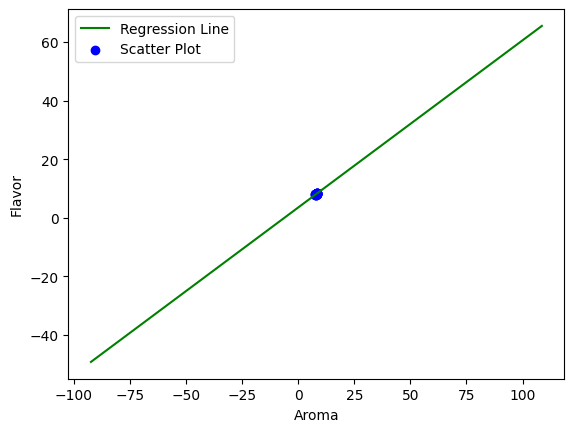

In [7]:
max_X=np.max(X)+100
min_X=np.min(X)-100

x=np.linspace(min_X,max_X,1000)
y=m*x+c
plt.plot(x,y,color='g',label='Regression Line')
plt.scatter(X,Y,color='b',label='Scatter Plot')

plt.xlabel('Aroma')
plt.ylabel('Flavor')
plt.legend()
plt.show()

In [15]:
sum1=0
sum2=0

for i in range(n):
  yp=m*X[i]+c
  sum1+=(yp-Y[i])**2
  sum2+=(Y[i]-mean_Y)**2
r2=1-(sum1/sum2)
print(r2)

[0.53448073]


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X=X.reshape((n,1))

reg=LinearRegression()

reg=reg.fit(X,Y)

r2_score=reg.score(X,Y)
print(r2_score)

0.5344807267651661
